<a href="https://colab.research.google.com/github/AAShK23/Feminism-and-its-affection-on-marriage/blob/main/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
np.random.seed(42)

### Measures of Central Tendency

Measures of central tendency provide a summary statistic on the center of a given distribution, a.k.a., the "average" value of the distribution.

In [185]:
x = st.skewnorm.rvs(-5, size=200000)

In [186]:
x[0:15]

array([-0.18076614, -0.11709961, -0.89585425, -1.76578799, -0.16240693,
        0.08037525, -1.43339636, -0.71366684, -0.47006903, -0.65349091,
       -0.26910877, -0.27376911, -0.20258308, -1.9160781 , -1.62274394])

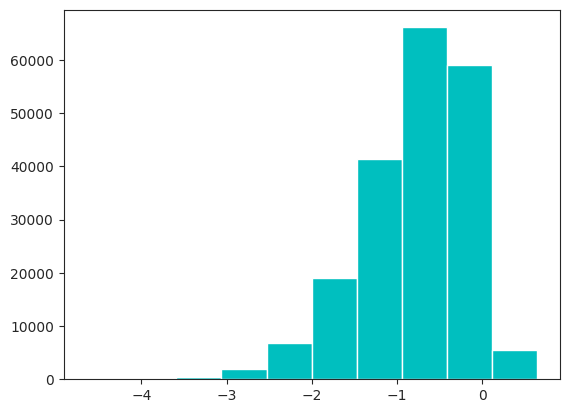

In [187]:
fig, ax = plt.subplots()
_ = plt.hist(x, color = 'c')

#### Mean

The most common measure of central tendency, synonomous with the term "average", is the **mean**, often symbolized with $\mu$ (population) or $\bar{x}$ (sample):

$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$

In [188]:
mean = x.mean()
mean

-0.7823621666587097

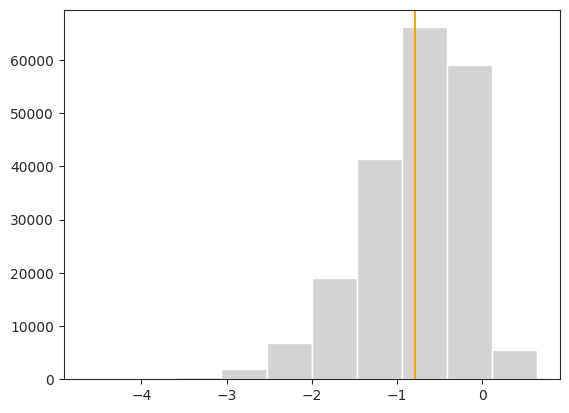

In [189]:
fig, ax = plt.subplots()
plt.axvline(x = x.mean(), color='orange')
_ = plt.hist(x, color = 'lightgray')

#### Median

The second most common measure of central tendency is the **median**, the midpoint value in the distribution: 

In [190]:
np.median(x)

-0.6752672042694887

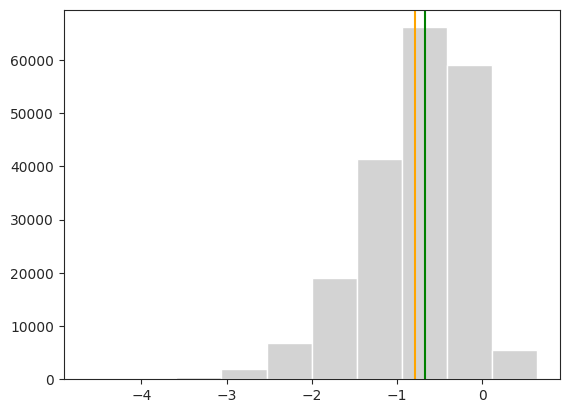

In [191]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

### Measures of Dispersion

#### Variance

$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$

In [192]:
var = x.var()
var

0.38819137793574676

#### Standard Deviation

A straightforward derivative of variance is **standard deviation** (denoted with $\sigma$), which is convenient because its units are on the same scale as the values in the distribution: 
$$ \sigma = \sqrt{\sigma^2} $$

In [193]:
x.var()**(1/2)

0.6230500605374714

In [194]:
std = x.std()
std

0.6230500605374714

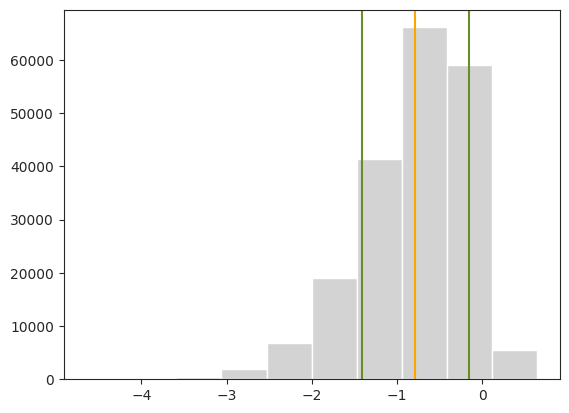

In [195]:
fig, ax = plt.subplots()
plt.axvline(x = mean, color='orange')
plt.axvline(x = mean+std, color='olivedrab')
plt.axvline(x = mean-std, color='olivedrab')
_ = plt.hist(x, color = 'lightgray')

#### Standard Error

A further derivation of standard deviation is **standard error**, which is denoted with $\sigma_\bar{x}$:
$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$

In [196]:
std/(x.size)**(1/2)

0.001393182288747145

### Gaussian Distribution

After Carl Friedrich Gauss. Also known as **normal distribution**: 

In [197]:
x = np.random.normal(size=10000)

In [198]:
sns.set_style('ticks')

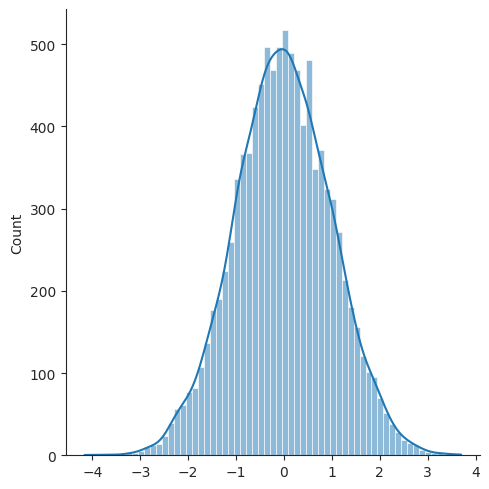

In [199]:
_ = sns.displot(x, kde=True)

### The Central Limit Theorem

To develop a functional understanding of the CLT, let's sample some values from our normal distribution:

In [200]:
x_sample = np.random.choice(x, size=5, replace=False)
x_sample

array([-0.20413784,  1.36128496, -1.63668194,  0.25517363, -0.94874821])

In [201]:
x_sample.mean()

-0.23462187779927715

The mean of a sample isn't always going to be close to zero with such a small sample:

In [202]:
x_sample.mean()

-0.23462187779927715

Let's define a function for generating **sampling distributions** of the mean of a given input distribution:

In [203]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

In [204]:
xc = sample_mean_calculator(x, 25, 70)
xc

[0.39802454069605503,
 -0.4192890858908702,
 -0.1428581305026907,
 -0.03173664252229834,
 -0.11950167985299251,
 -0.15821954781323685,
 -0.12310300170571484,
 -0.17535493182716816,
 -0.10946588883193692,
 -0.06171997748422018,
 0.11822058087735302,
 -0.006473279628365911,
 -0.43513031918412437,
 -0.03332545325578239,
 -0.011206396835355958,
 0.17546658689172903,
 -0.18056965723549787,
 -0.2387717163812132,
 0.07395993160634892,
 -0.13018436577754003,
 0.1284220067380439,
 -0.22308155810522287,
 -0.02889221481753867,
 0.04540163665479828,
 -0.10633453125757056,
 -0.22510896394988159,
 0.25039686323664195,
 0.4547723709402346,
 0.11371935410946567,
 0.025870229521525373,
 0.20758776336316076,
 0.013190343701376972,
 0.049649435714175134,
 0.04479706203569242,
 0.2852632527482598,
 0.010715523031681027,
 0.012491052359145409,
 0.21543972334684394,
 0.3091502061588509,
 0.31226406297561626,
 -0.14658973881790793,
 -0.04326991918428007,
 -0.1330166300229971,
 0.45147545620989626,
 -0.360585

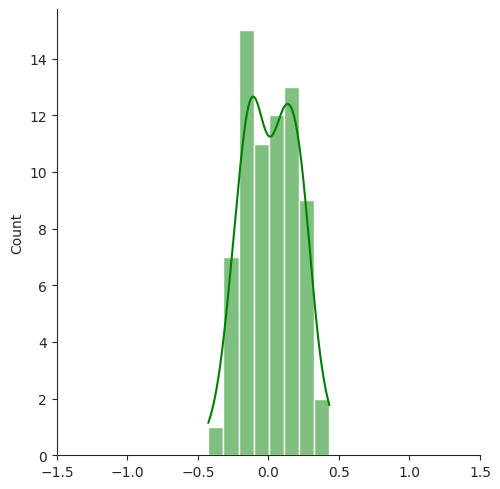

In [205]:
sns.displot(sample_mean_calculator(x, 25, 70), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

The more samples we take, the more likely that the sampling distribution of the means will be normally distributed: 

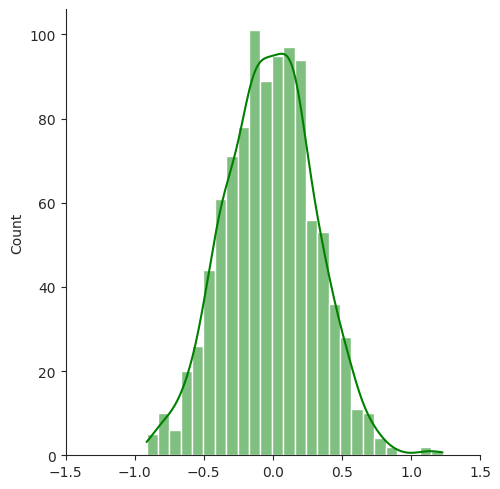

In [206]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

The larger the sample, the tighter the sample means will tend to be around the population mean:

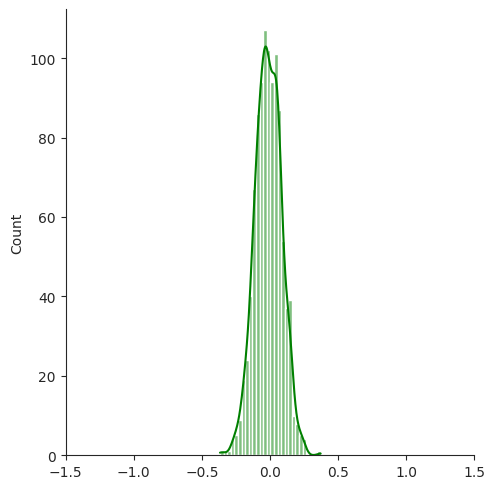

In [207]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

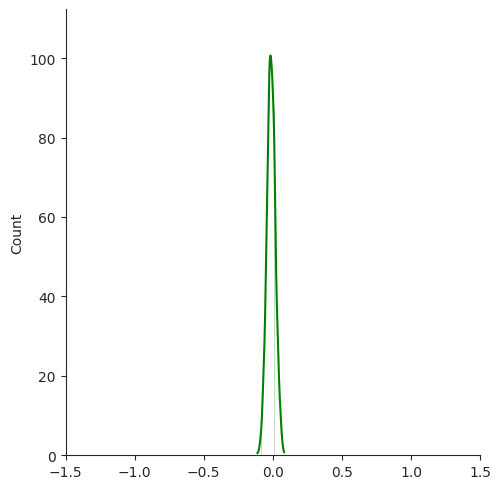

In [208]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

#### Sampling from a skewed distribution

In [209]:
s = st.skewnorm.rvs(10, size=10000)

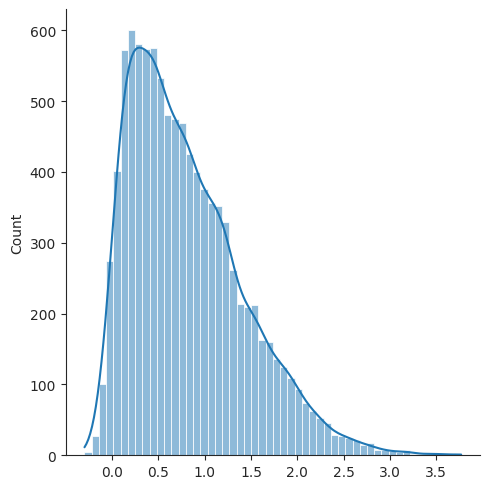

In [210]:
_ = sns.displot(s, kde=True)

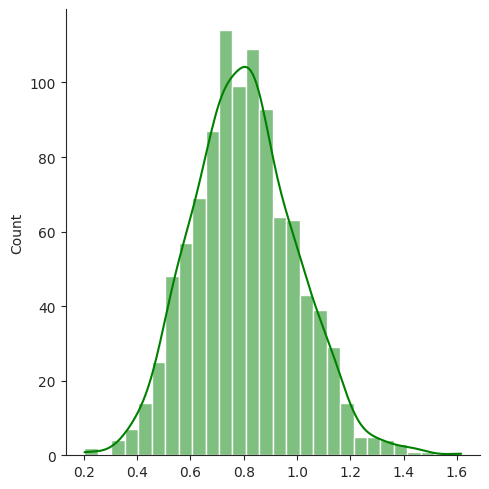

In [211]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

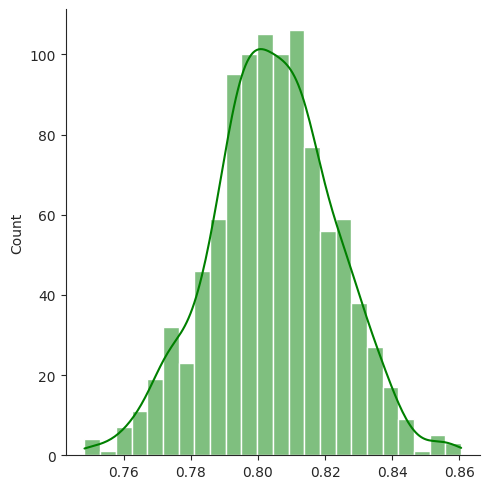

In [212]:
_ = sns.displot(sample_mean_calculator(s, 1000, 1000), color='green', kde=True)

#### Sampling from a multimodal distribution

In [213]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 7.0, size=5000)))

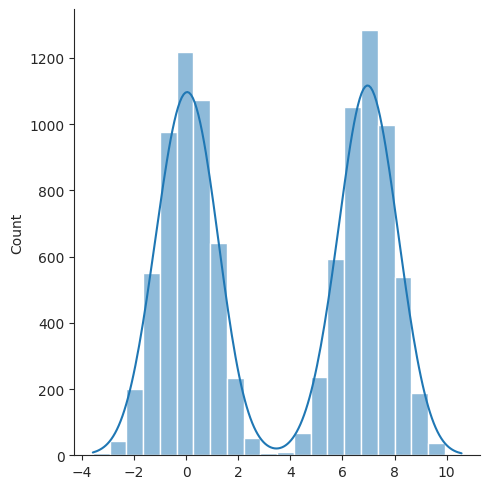

In [214]:
_ = sns.displot(m, kde=True)

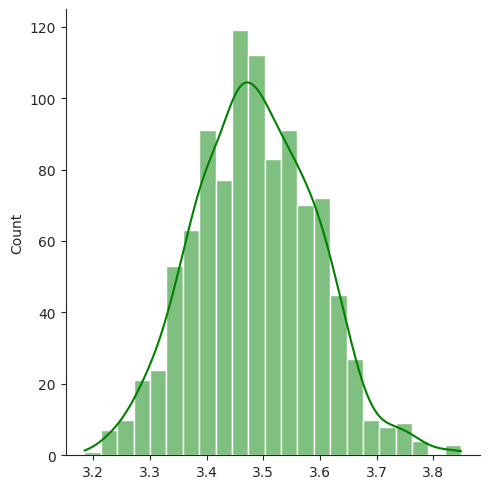

In [215]:
_ = sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

#### Sampling from uniform

Even sampling from the highly non-normal uniform distribution, the sampling distribution comes out normal: 

In [216]:
u = np.random.uniform(size=10000)

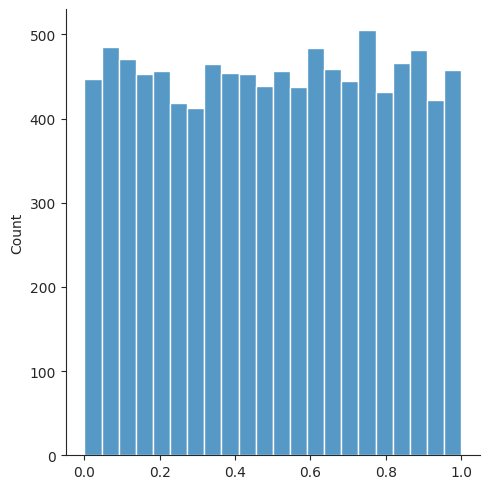

In [217]:
_ = sns.displot(u)

Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to apply statistical and ML models that are configured for normally distributed noise, which is often the default assumption.

As an example, the "*t*-test" (covered shortly in *Intro to Stats*) allows us to infer whether two samples come from different populations (say, an experimental group that receives a treatment and a control group that receives a placebo). Thanks to the CLT, we can use this test even if we have no idea what the underlying distributions of the populations being tested are, which may be the case more frequently than not. 

### z-scores

Assuming normally-distributed data, a z-score indicates how many standard deviations away from the mean a data point (say, $x_i$) is: 
$$ z = \frac{x_i-\mu}{\sigma} $$

That is, the formula *standardizes* a given score $x_i$ to the (standard normal) *z*-distribution. (As we covered in *Probability & Information Theory*, you could standardize any normal distribution to a mean of zero and standard deviation of one by subtracting its original mean and then dividing by its original standard deviation.)

For example, let's say you get 85% on a CS101 exam. Sounds like a pretty good score and you did extremely well relative to your peers if the mean was 60% with a standard deviation of 10%:

In [218]:
x_i = 85
mu = 60
sigma = 10

In [219]:
x = np.random.normal(mu, sigma, 10000)

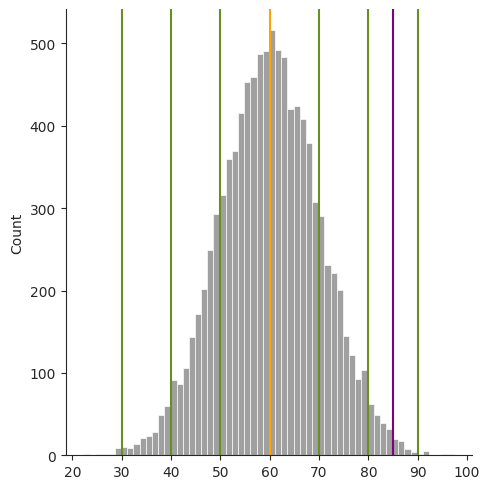

In [220]:
sns.displot(x, color='gray')
ax.set_xlim(50, 100)
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

Your z-score is 2.5 standard deviations above the mean: 

In [221]:
z = (x_i - mu)/sigma
z

2.5

Or using our simulated class of 10k CS101 students: 

In [222]:
z = (x_i - np.mean(x))/np.std(x)
z

2.4862383039578977

Less than one percent of the class outperformed you: 

In [223]:
len(np.where(x > 85)[0])

54

In [224]:
100*68/10000

0.68

In [225]:
np.percentile(x, 99.5)

85.34404776026257

### *p*-values

These quantify the *p*robability that a given observation would occur by chance alone. 

For example, we saw above that with our simulated 10k exam results, only 69 folks attained a *z*-score above 2.5 and only 67 (=10000-9993) attained a *z*-score below -2.5. Thus, if we were to randomly sample one of the 10k CS101 exam results, we would expect it to be outside of 2.5 (i.e., +/- 2.5) standard deviations only 1.36% of the time: 
$$ \frac{69+67}{10000} = 0.0136 = 1.36\% $$

Equivalent to increasing our CS101 class size from 10k toward infinity, the probability of a score being further than 2.5 standard deviations from the mean of a normal distribution can be determined with the distribution's *cumulative distribution function* (CDF): 

In [226]:
p_below = st.norm.cdf(-2.5)
p_below

0.006209665325776132

In [227]:
p_below*10000

62.096653257761325

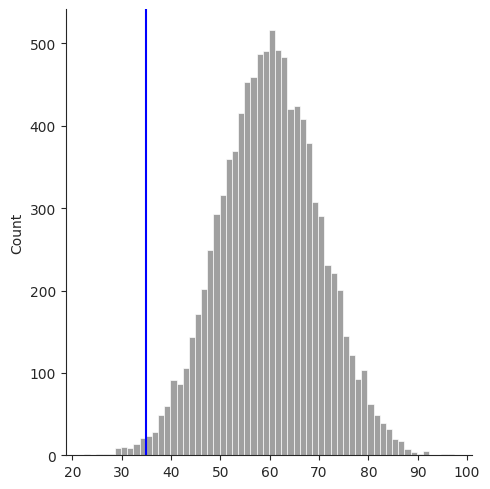

In [228]:
sns.displot(x, color='gray')
_ = plt.axvline(mu-2.5*sigma, color='blue')

In [229]:
st.norm.cdf(2.5)

0.9937903346742238

In [230]:
p_above = 1-st.norm.cdf(2.5)
p_above

0.006209665325776159

In [231]:
p_above*10000

62.09665325776159

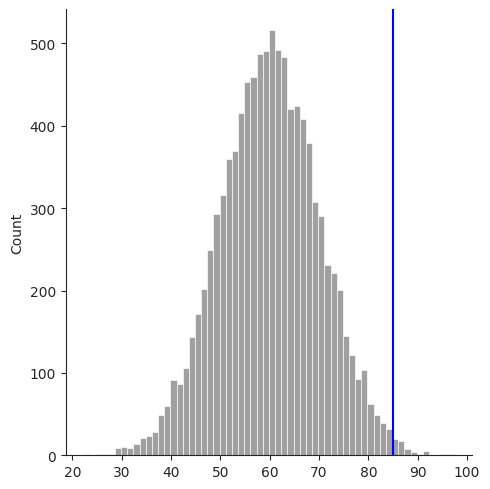

In [232]:
sns.displot(x, color='gray')
_ = plt.axvline(mu+2.5*sigma, color='blue')

In [233]:
p_outside = p_below + p_above
p_outside

0.01241933065155229

In [234]:
p_outside*10000

124.1933065155229

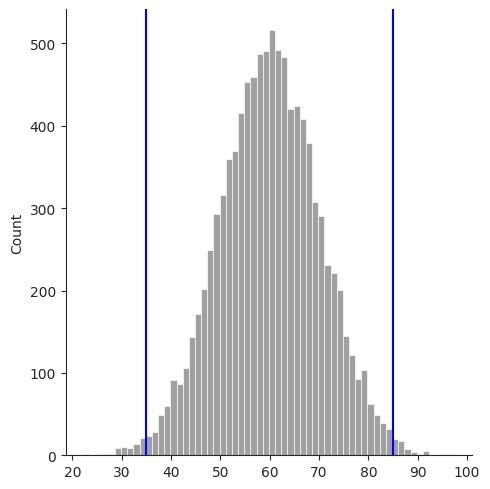

In [235]:
sns.displot(x, color='gray')
plt.axvline(mu+2.5*sigma, color='blue')
_ = plt.axvline(mu-2.5*sigma, color='blue')

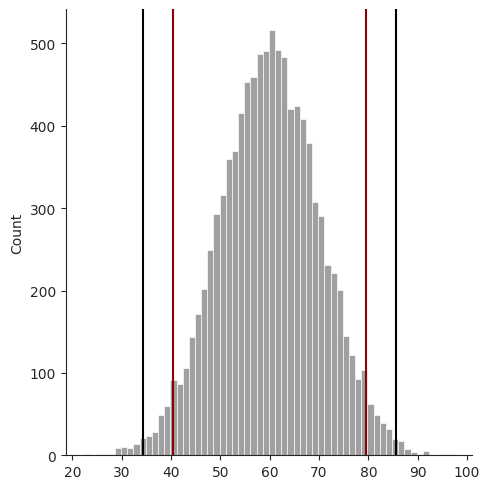

In [236]:
sns.displot(x, color='gray')

plt.axvline(mu+1.96*sigma, color='darkred')
plt.axvline(mu-1.96*sigma, color='darkred')

plt.axvline(mu+2.56*sigma, color='black')
_ = plt.axvline(mu-2.56*sigma, color='black')

### Comparing Means with *t*-tests

Where *z*-scores apply to *individual values* only, *t*-tests enables us to compare (the mean of) a sample of *multiple values* to a reference mean.

#### Student's Single-Sample *t*-test

Named after William Sealy Gosset, an Oxford-trained scientist and mathematician, who became a stout yield statistician for Guinness in Dublin (from 1899 to his fatal heart attack in 1937 shortly after being promoted to head brewer). Alongside sabbaticals in Karl Pearson's UCL Biometric Laboratory, Gosset published under the pseudonym Student (including on the *t*-test, starting in 1908) as it was against Guinness policy to publish.

Recalling the formula for calculating a *z*-score: 
$$ z = \frac{x_i-\mu}{\sigma} $$

The **single-sample *t*-test** is a variation on the theme and is defined by: 
$$ t = \frac{\bar{x} - \mu_0}{s_{\bar{x}}} $$
Where: 
* $\bar{x}$ is the sample mean
* $\mu_0$ is a reference mean, e.g., known population mean or "null hypothesis" mean
* $s_{\bar{x}}$ is the sample standard error

Let's say you're the head brewer at Guinness. Your baseline brewing process yields 50L of stout. Using a new genetically-modified yeast, you obtain the following yields (all in liters) in four separate experiments: 

In [237]:
x = [48, 50, 54, 60]

We can obtain the *t*-statistic for this sample as follows: 

In [238]:
xbar = np.mean(x)
xbar

53.0

In [239]:
sx = st.sem(x)
sx

2.6457513110645907

In [240]:
t = (xbar-50)/sx
t

1.1338934190276817

We can convert the *t*-value into a *p*-value using Student's *t*-distribution (similar to the normal *z*-distribution, but varies based on number of data points in sample; see [here](https://en.wikipedia.org/wiki/Student%27s_t-distribution) for more detail):

In [241]:
def p_from_t(my_t, my_n):
    return 2 * st.t.cdf(-abs(my_t), my_n-1)

In [242]:
p_from_t(t, len(x))

0.3392540508564543

(An illustration of **degrees of freedom**: If we know the mean of the array `x`, three of its four values can vary freely. That is, if we know three of the values in the array, the fourth has no "freedom"; it must be a specific value. Thus, the most common situation with statistical tests is that we have *n*-1 degrees of freedom.)

For everyday usage, however, we can rely on the SciPy `ttest_1samp()` method: 

In [ ]:
st.ttest_1samp(x, 50)